<a href="https://colab.research.google.com/github/KavyaS1/Possions-Croissants-/blob/main/Datathon_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import statements
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
allStatesData = pd.read_csv('allStateStatisticsNEW.csv')

allStatesData


,Unnamed: 0,State,County,Tract,Number of families,Number of families below poverty line,Vacancy,Coastal Flooding Risk Score,Percent below poverty line,Family median income,Housing Cost,At Risk
0,0,Florida,Alachua,3.01,508,41.0,297,0.000000,7.9,48464.0,852.0,0
1,1,Florida,Alachua,3.02,574,30.0,156,0.000000,5.1,65109.0,924.0,0
2,2,Florida,Alachua,4.00,1393,267.0,159,0.000000,19.1,55224.0,961.0,0
3,3,Florida,Alachua,5.00,846,156.0,391,0.000000,18.4,96591.0,1162.0,0
4,4,Florida,Alachua,6.00,1454,486.0,256,0.000000,33.4,27402.0,792.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6274,6274,Texas,Nueces,9502.02,796,106.0,287,82.886474,13.2,51111.0,513.0,1
6275,6275,Texas,Nueces,9503.00,769,188.0,298,82.487850,24.4,62525.0,443.0,1
6276,6276,Texas,Nueces,9504.00,642,47.0,218,0.000000,7.2,59044.0,620.0,0
6277,6277,Texas,Nueces,9501.00,510,13.0,169,0.000000,2.5,103529.0,590.0,0


There are 595 out of our 6279 data points that have been flagged as at risk

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Step 2: Feature Selection
X = allStatesData[['Number of families below poverty line', 'Vacancy']]
y = allStatesData['At Risk']

# Step 3: Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Training
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_scaled, y)

# Step 5: Prediction
# Filter data where 'At Risk' is true
at_risk_data = allStatesData[allStatesData['At Risk'] == 1][['Number of families below poverty line', 'Vacancy']]
at_risk_data_scaled = scaler.transform(at_risk_data)

# Find K nearest neighbors for each data point where 'At Risk' is true
neighbors = knn.kneighbors(at_risk_data_scaled, return_distance=False)

# Print the indices of the K nearest neighbors for each data point
for i, neighbor_indices in enumerate(neighbors):
    original_index = at_risk_data.index[i]
    print(f"Original Index of Data Point: {original_index}")
    #print(f"Original Index of Data Point {i+1}: {original_index}")
    print(f"Nearest Neighbor Indices:", neighbor_indices[1:])

Original Index of Data Point: 60
Nearest Neighbor Indices: [1627 5807 1299 4748 6076]
Original Index of Data Point: 84
Nearest Neighbor Indices: [1243 1730 4866  143  185]
Original Index of Data Point: 86
Nearest Neighbor Indices: [2631  608 5628 4934 5795]
Original Index of Data Point: 88
Nearest Neighbor Indices: [  87 3546 6083   32 4715]
Original Index of Data Point: 89
Nearest Neighbor Indices: [  89 2825 2411 2911 4196]
Original Index of Data Point: 91
Nearest Neighbor Indices: [4988 1432 1225 1470 4270]
Original Index of Data Point: 115
Nearest Neighbor Indices: [3523 4085 2542 6112 5558]
Original Index of Data Point: 122
Nearest Neighbor Indices: [4630 3807   98 2112 3189]
Original Index of Data Point: 164
Nearest Neighbor Indices: [3396 1489  669  850 1369]
Original Index of Data Point: 165
Nearest Neighbor Indices: [2415 4573 5546 3289 4134]
Original Index of Data Point: 172
Nearest Neighbor Indices: [2483 4346  843 6257 2315]
Original Index of Data Point: 173
Nearest Neighbo

In [ ]:
# Store the indices of the K nearest neighbors for each data point in a dictionary
nearest_neighbors_dict = {}
for i, neighbor_indices in enumerate(neighbors):
    original_index = at_risk_data.index[i]
    nearest_neighbors_dict[original_index] = list(neighbor_indices[1:])

# Print the dictionary containing the indices of the K nearest neighbors for each data point
print(nearest_neighbors_dict)

{60: [1627, 5807, 1299, 4748, 6076], 84: [1243, 1730, 4866, 143, 185], 86: [2631, 608, 5628, 4934, 5795], 88: [87, 3546, 6083, 32, 4715], 89: [89, 2825, 2411, 2911, 4196], 91: [4988, 1432, 1225, 1470, 4270], 115: [3523, 4085, 2542, 6112, 5558], 122: [4630, 3807, 98, 2112, 3189], 164: [3396, 1489, 669, 850, 1369], 165: [2415, 4573, 5546, 3289, 4134], 172: [2483, 4346, 843, 6257, 2315], 173: [565, 5793, 2217, 4097, 5839], 185: [143, 6187, 989, 6191, 84], 202: [1866, 4283, 3154, 462, 4774], 221: [221, 4156, 5972, 1307, 1036], 226: [3885, 1654, 4365, 3550, 977], 261: [959, 4897, 3677, 1621, 5968], 360: [1636, 4407, 4716, 760, 4696], 392: [4893, 5402, 2868, 5257, 3211], 393: [3309, 5695, 3713, 2468, 375], 397: [2419, 5164, 1315, 1205, 5412], 440: [728, 3495, 4771, 5337, 3611], 442: [6181, 3252, 6199, 3388, 4991], 546: [5427, 508, 5895, 342, 2073], 557: [479, 3085, 1333, 6024, 5167], 559: [99, 898, 2318, 708, 3817], 562: [5702, 3403, 5530, 4846, 4900], 592: [4776, 5604, 5984, 4787, 1316], 59

In [ ]:
# All of the at risk indices
at_risk_indices = allStatesData[allStatesData['At Risk'] == 1].index.tolist()

In [ ]:
print(list(nearest_neighbors_dict)[0]) #this is going to index the key
print(nearest_neighbors_dict[(list(nearest_neighbors_dict)[0])]) #this is going to index the values stored at key=0

60
[1627, 5807, 1299, 4748, 6076]


In [ ]:
# Define the find_best_relocation function
def find_best_relocation(original_index, nearest_neighbors_dict):
    shortest_difference = float('inf')
    best_neighbor_index = None

    # Retrieve the distances and indices of the nearest neighbors for the original index
    neighbor_data = nearest_neighbors_dict.get(original_index)  ##this is going to index the values stored at key=original_index
    if neighbor_data is not None and len(neighbor_data) > 0:
        # Calculate the difference between the original index and each neighbor
        for neighbor_index in neighbor_indices:
            difference = abs(original_index - neighbor_index)
            if difference < shortest_difference:
                shortest_difference = difference
                best_neighbor_index = neighbor_index

        print("Best place for relocation:")
        print(allStatesData.iloc[best_neighbor_index])


# Example usage
original_index = at_risk_indices[2] # Index of the original data point
find_best_relocation(original_index, nearest_neighbors_dict)
print()
print(allStatesData.iloc[86])
#at_risk_indices[572]

Best place for relocation:
Unnamed: 0                                      65
State                                      Florida
County                                         Bay
Tract                                         4.02
Number of families                            1812
Number of families below poverty line        184.0
Vacancy                                        307
Coastal Flooding Risk Score              79.225141
Percent below poverty line                    10.1
Family median income                      106029.0
Housing Cost                                1181.0
At Risk                                          0
Name: 65, dtype: object

Unnamed: 0                                      86
State                                      Florida
County                                         Bay
Tract                                         18.0
Number of families                             265
Number of families below poverty line         61.0
Vacancy                       

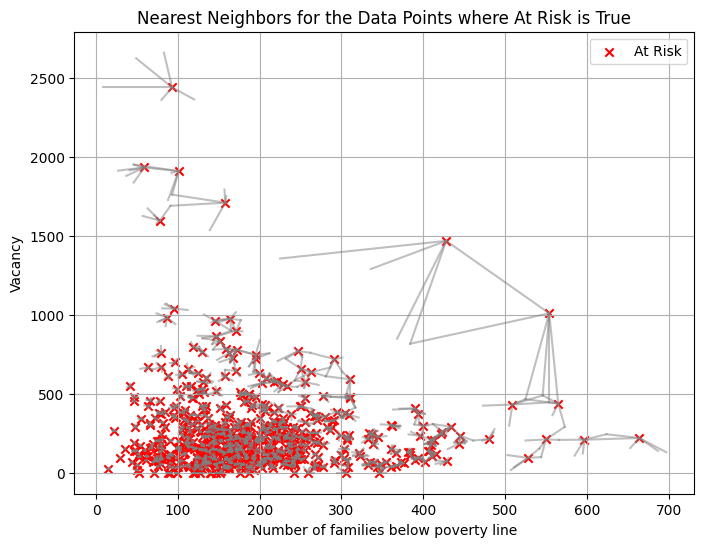

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 2: Feature Selection
X = allStatesData[['Number of families below poverty line', 'Vacancy']]
y = allStatesData['At Risk']

# Step 3: Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Training
k = 6  # K neighbors include the point itself, so we use k+1 to exclude the point itself
nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(X_scaled)

# Step 5: Finding nearest neighbors
# Filter data where 'At Risk' is true
at_risk_data = allStatesData[allStatesData['At Risk'] == 1]  # Select the first 10 data points where 'At Risk' is true
at_risk_data_scaled = scaler.transform(at_risk_data[['Number of families below poverty line', 'Vacancy']])

# Finding the indices of the k nearest neighbors for each data point where 'At Risk' is true
distances, indices = nbrs.kneighbors(at_risk_data_scaled)

# Plot the data points
plt.figure(figsize=(8, 6))

# Plot nearest neighbors for the first 10 data points
for i, neighbor_indices in enumerate(indices):
    original_index = at_risk_data.index[i]
    for j in neighbor_indices[1:]:
        plt.plot([at_risk_data.loc[original_index, 'Number of families below poverty line'], allStatesData.loc[j, 'Number of families below poverty line']],
                 [at_risk_data.loc[original_index, 'Vacancy'], allStatesData.loc[j, 'Vacancy']], color='grey', alpha=0.5)

# Highlight the data points where 'At Risk' is true
plt.scatter(at_risk_data['Number of families below poverty line'], at_risk_data['Vacancy'], c='red', marker='x', label='At Risk')

# Add labels and title
plt.xlabel('Number of families below poverty line')
plt.ylabel('Vacancy')
plt.title('Nearest Neighbors for the Data Points where At Risk is True')
plt.legend()
plt.grid(True)
plt.show()


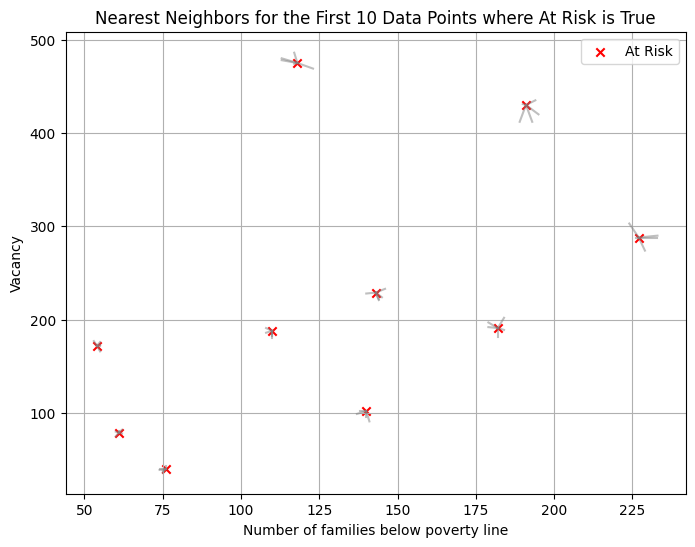

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 2: Feature Selection
X = allStatesData[['Number of families below poverty line', 'Vacancy']]
y = allStatesData['At Risk']

# Step 3: Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Training
k = 6  # K neighbors include the point itself, so we use k+1 to exclude the point itself
nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(X_scaled)

# Step 5: Finding nearest neighbors
# Filter data where 'At Risk' is true
at_risk_data = allStatesData[allStatesData['At Risk'] == 1].head(10)  # Select the first 10 data points where 'At Risk' is true
at_risk_data_scaled = scaler.transform(at_risk_data[['Number of families below poverty line', 'Vacancy']])

# Finding the indices of the k nearest neighbors for each data point where 'At Risk' is true
distances, indices = nbrs.kneighbors(at_risk_data_scaled)

# Plot the data points
plt.figure(figsize=(8, 6))

# Plot nearest neighbors for the first 10 data points
for i, neighbor_indices in enumerate(indices):
    original_index = at_risk_data.index[i]
    for j in neighbor_indices[1:]:
        plt.plot([at_risk_data.loc[original_index, 'Number of families below poverty line'], allStatesData.loc[j, 'Number of families below poverty line']],
                 [at_risk_data.loc[original_index, 'Vacancy'], allStatesData.loc[j, 'Vacancy']], color='grey', alpha=0.5)

# Highlight the data points where 'At Risk' is true
plt.scatter(at_risk_data['Number of families below poverty line'], at_risk_data['Vacancy'], c='red', marker='x', label='At Risk')

# Add labels and title
plt.xlabel('Number of families below poverty line')
plt.ylabel('Vacancy')
plt.title('Nearest Neighbors for the First 10 Data Points where At Risk is True')
plt.legend()
plt.grid(True)
plt.show()
